In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('uncleaned_dataset.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [3]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [4]:
predictors = df.loc[:, df.columns != 'Target']
target = df['Target']

/var/folders/3b/2s6k_n693fz2sn_hlv78l67w0000gn/T/ipykernel_18607/2329719653.py:29: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/aml/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


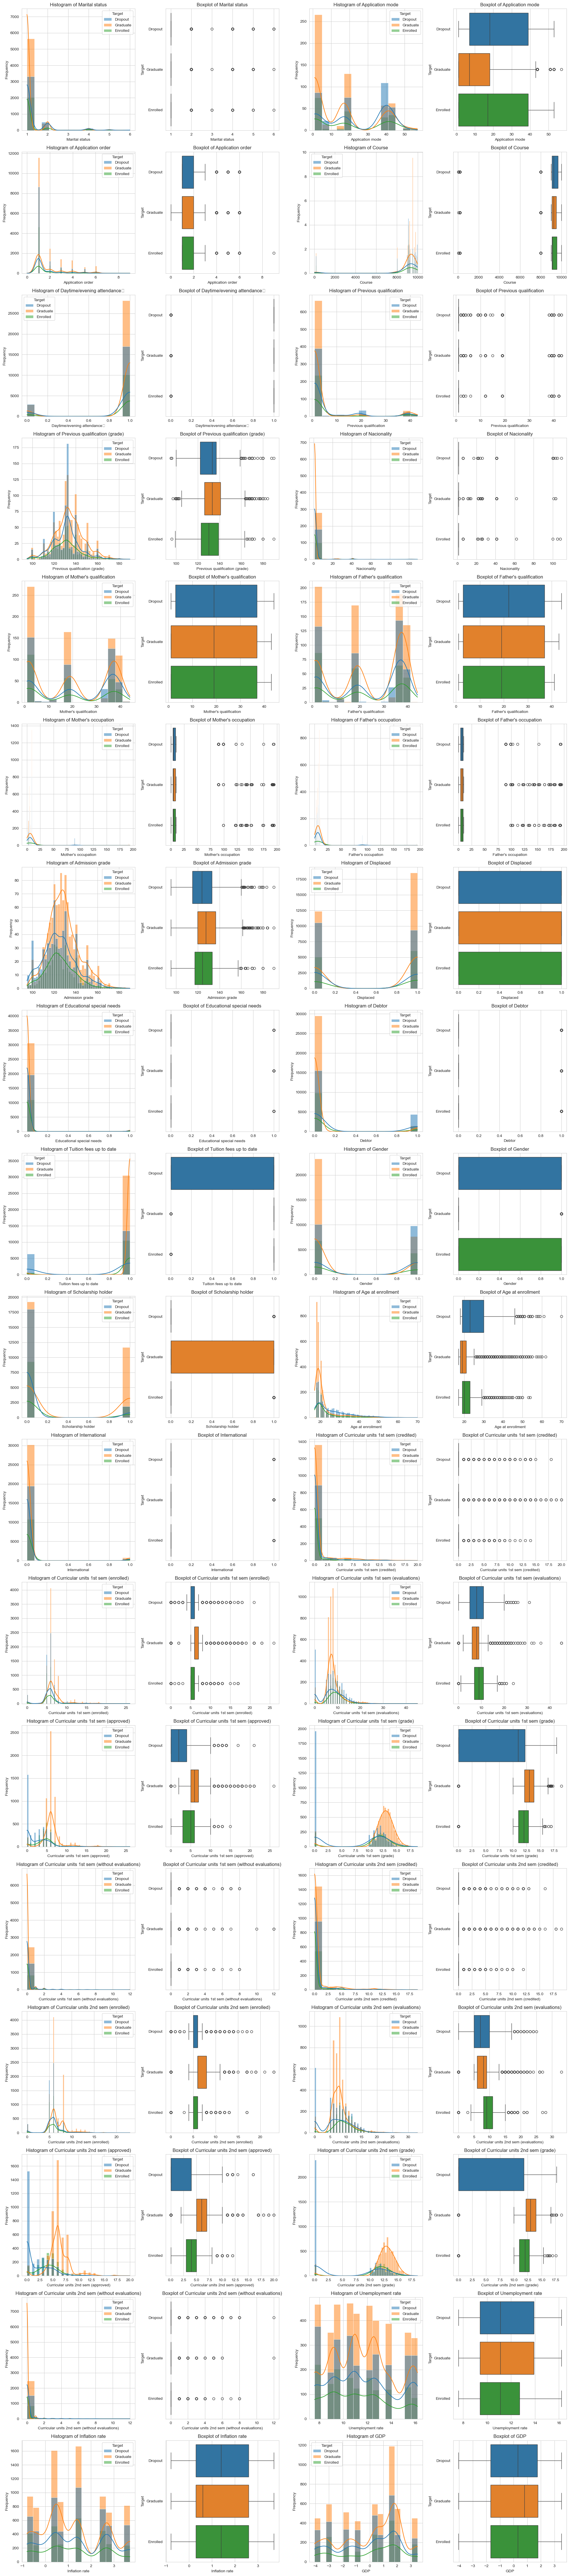

In [5]:
import math

# Define the number of columns and grid size
num_features = len(predictors.columns)
plots_per_row = 4
rows = math.ceil(num_features * 2 / plots_per_row)  # Each feature gets 2 plots (hist + boxplot)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, rows * 5))
axes = axes.flatten()

# Generate plots
for i, col in enumerate(predictors.columns):
    # Histogram (plot 1 for this feature)
    sns.histplot(
        data=predictors, x=col, stat="frequency", hue=target,
        fill=True, common_norm=False, kde=True,
        alpha=0.5, linewidth=0.5, ax=axes[2 * i]
    )
    axes[2 * i].set_title(f"Histogram of {col}")

    # Boxplot (plot 2 for this feature)
    sns.boxplot(x=predictors[col], y=target, dodge=False, hue=target, ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f"Boxplot of {col}")

# Remove unused subplots
for i in range(2 * num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

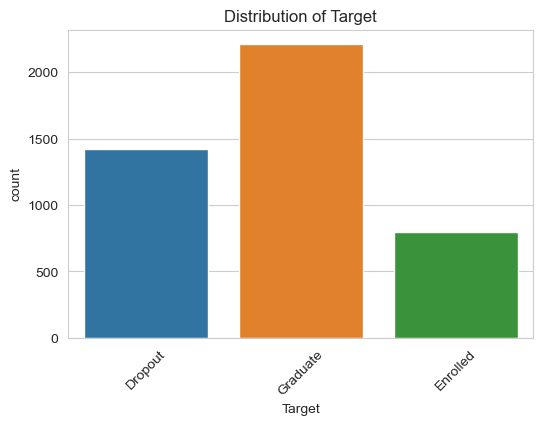

In [6]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Target')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [7]:

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Separate numerical and categorical features
predictors = df.loc[:, df.columns != 'Target']
target = df[['Target']]

# Step 1: Normalize Numerical Features
scaler = MinMaxScaler()
norm_preds = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Step 2: One-Hot Encode Categorical Features
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(target)
target_classes = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(target.columns))

df_encoded = pd.concat([norm_preds, target_classes], axis=1)
df_encoded.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0,0.0,0.0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0.0,0.0,1.0
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0,0.0,0.0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0.0,0.0,1.0
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0.0,0.0,1.0


/opt/anaconda3/envs/aml/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/aml/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


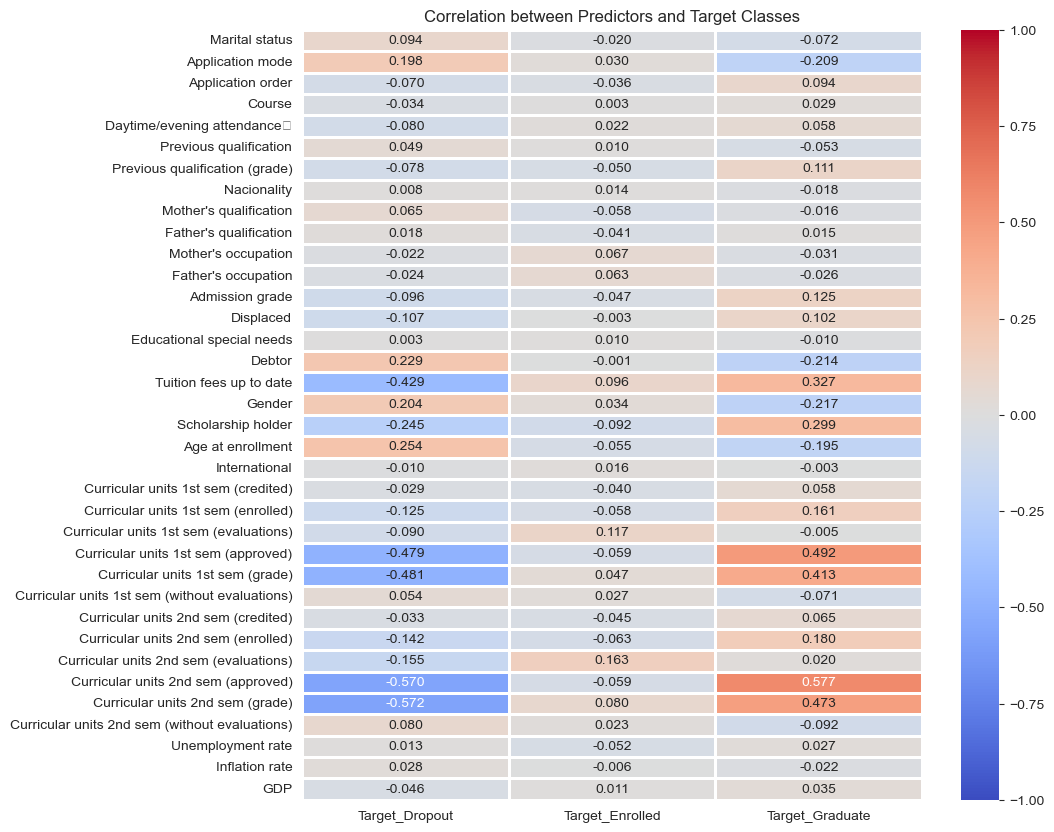

╒═════════════════╤════════════════════════════════════════╤════════════════════════════════════════╤════════════════════════════════════════════════╕
│  Target Class   │    Positively Correlated Predictors    │    Negatively Correlated Predictors    │           Non-Correlated Predictors            │
╞═════════════════╪════════════════════════════════════════╪════════════════════════════════════════╪════════════════════════════════════════════════╡
│ Target_Dropout  │            Application mode            │               Displaced                │                 Marital status                 │
│                 │                 Debtor                 │        Tuition fees up to date         │               Application order                │
│                 │                 Gender                 │           Scholarship holder           │                     Course                     │
│                 │           Age at enrollment            │  Curricular units 1st sem (enroll

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create an empty DataFrame to store correlations
correlations = pd.DataFrame(index=predictors.columns.values, columns=target_classes.columns.values)

# Step 1: Compute correlations (predictor ~ target_classes)
for row, category_name in enumerate(target_classes.columns):
    for col, predictor_name in enumerate(predictors.columns):
        correlations.at[predictor_name, category_name] = predictors[predictor_name].corr(target_classes[category_name])

# Step 2: Convert the correlation values to float
correlations = correlations.astype(np.float64)

# Step 3: Create heatmap of correlations
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, linewidths=1, fmt=".3f", cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
plt.title("Correlation between Predictors and Target Classes")
plt.show()

# Step 4: Identify positive, negative, and non-correlated predictors
positive_correlations = correlations[correlations > 0]
negative_correlations = correlations[correlations < 0]

# Helper function to format correlation display
def display_correlations(c):
    return "\n".join(map(lambda x: x.strip(), c.index.values)) if len(c.index.values) > 0 else "N/A"

# Step 5: Prepare the table of correlations
table = []
headers = ['Target Class', 'Positively Correlated Predictors', 'Negatively Correlated Predictors', 'Non-Correlated Predictors']

for category in correlations.columns:
    # Get all correlations for the current target category
    category_corr = correlations[category]
    positive_corr = category_corr[category_corr >= 0.1].dropna() # Positive correlations (>= 0.1)
    negative_corr = category_corr[category_corr <= -0.1].dropna() # Negative correlations (<= -0.1)
    no_corr = category_corr[~category_corr.isin(positive_corr) & ~category_corr.isin(negative_corr)].dropna() # Non-correlated (neither positive nor negative)

    table.append([category, display_correlations(positive_corr), display_correlations(negative_corr), display_correlations(no_corr)])

# Step 6: Display the table of correlations
print(tabulate(table, headers, tablefmt='fancy_grid', stralign='center'))
